In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [42]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [43]:
le = LabelEncoder()
list1= ['discipline','rank','sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [44]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


Here we can see that salary varies from 57800 to 231545.

# Correlation:

In [45]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

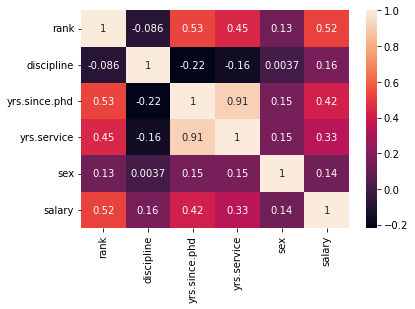

In [46]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

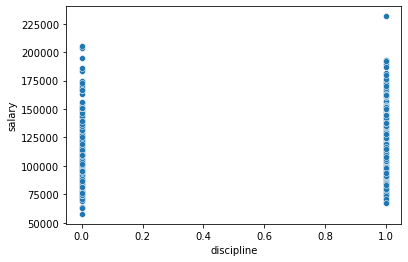

In [47]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

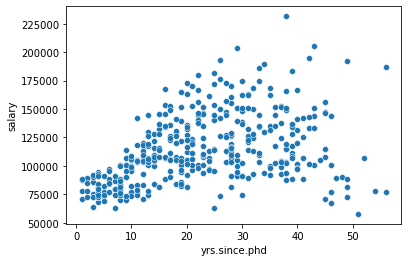

In [48]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

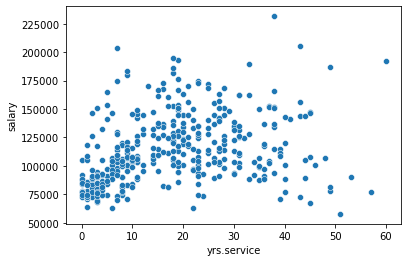

In [49]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

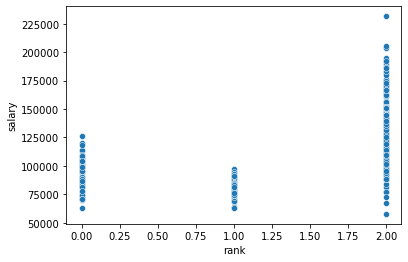

In [50]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

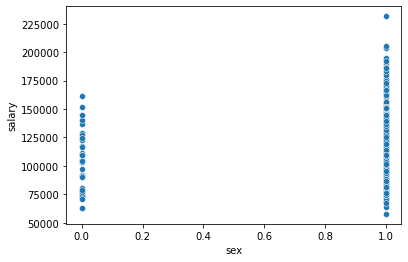

In [51]:
sns.scatterplot(x='sex',y='salary',data=df)

In [52]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

we can drop 'sex' column as it has more skewed data and less correlated

In [53]:
df.drop(['sex','discipline'],axis=1,inplace=True)

In [54]:
df.head(5)

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500


# Checking outliers:

rank                AxesSubplot(0.125,0.536818;0.227941x0.343182)
yrs.since.phd    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
yrs.service      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
salary                 AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

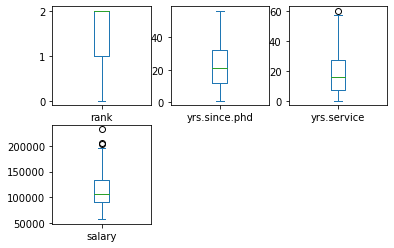

In [55]:
df.plot(kind='box',subplots=True,layout=(2,3))

By this visualization we can conclude that outliers may be present in yrs.service and salary column

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(397, 4)

In [57]:
threshold = 3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [58]:
len(np.where(z>3)[0])

4

In [59]:
df_new = df[(z<3).all(axis=1)]
print("Old Dataframe : ",df.shape)
print("New dataframe : ",df_new.shape)
print("data lost : ", df.shape[0] - df_new.shape[0])

Old Dataframe :  (397, 4)
New dataframe :  (393, 4)
data lost :  4


# Percentage of Data Loss

In [60]:
loss_percent = (397-393)/397*100
print(loss_percent,"%")

1.0075566750629723 %


Spliting data

In [61]:
x= df.iloc[:,:4]
y = df.iloc[:,-1]

# Transforming Data to remove skewness

In [62]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.69005113, -0.12729454,  0.25061906,  0.93169352],
       [ 0.69005113, -0.04917821,  0.10511199,  1.6936509 ],
       [-1.09153554, -1.62812069, -1.28803213, -1.25423316],
       ...,
       [ 0.69005113,  1.39552477,  0.69878852, -0.26938799],
       [ 0.69005113,  0.32017198,  0.02856739, -0.52698208],
       [-1.09153554, -1.13497737, -1.12348349, -1.18781833]])

In [63]:
pd.DataFrame(x).skew()

0   -0.830409
1   -0.132757
2   -0.122152
3    0.012872
dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.69005113, -0.12729454,  0.25061906,  0.93169352],
       [ 0.69005113, -0.04917821,  0.10511199,  1.6936509 ],
       [-1.09153554, -1.62812069, -1.28803213, -1.25423316],
       ...,
       [ 0.69005113,  1.39552477,  0.69878852, -0.26938799],
       [ 0.69005113,  0.32017198,  0.02856739, -0.52698208],
       [-1.09153554, -1.13497737, -1.12348349, -1.18781833]])

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=45)

In [66]:
x_train.shape

(317, 4)

In [67]:
y_train.shape

(317,)

In [68]:
x_test.shape

(80, 4)

In [69]:
y_test.shape

(80,)

In [70]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)       

0.9672918021075977

In [71]:
pred = lr.predict(x_test)
pred

array([126038.54774873, 157992.94049782,  60677.23416439, 130629.1857865 ,
       172481.55090986,  84559.91560968, 151544.76939041, 124907.79938733,
        68827.47850554,  80300.08167153,  88778.71932673,  31796.06511177,
       129605.47244058,  88483.24440909,  82864.08643396, 142416.49027748,
       129090.48958114, 109936.40393546, 149880.15917106, 102604.11445364,
       163815.93491916,  59406.78306118,  96580.45076197, 131699.9933064 ,
       145245.39696434,  80683.64303894, 107067.9843944 , 166386.12013936,
       123264.23634404,  64211.94428401, 129024.69148016, 111069.17481193,
       131474.83367856,  94116.95260753, 108850.1695481 ,  88727.08481031,
       127226.23038829, 128208.72631513,  94053.57884997, 177871.70080205,
       147333.91161495,  61956.44700381,  75506.08994584, 113843.78187777,
        68787.778202  , 114455.74492447, 182232.45570617, 103103.44561245,
        90569.55869587, 100275.22380189, 120017.48049576,  73915.7273078 ,
        67475.62722981,  

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

42781676.38420914


In [73]:
np.sqrt(mean_squared_error(pred,y_test))

6540.7703203987485

# Regularization-- Lasso,Ridge

In [74]:
from sklearn.linear_model import Lasso,Ridge

la = Lasso(alpha = 0.001)
la.fit(x_train,y_train)
print(la.score(x_train,y_train))
predlasso = la.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,predlasso)))

0.9672918021075607
42781684.81733665
Mean Squared Error :  6540.770965057303


In [75]:
rd = Ridge(alpha = 0.001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predridge = rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,predridge)))

0.9672918020870485
42781500.93958849
Mean Squared Error :  6540.756908767401


In [76]:
from sklearn.linear_model import ElasticNet
er = ElasticNet(alpha=0.001)
er.fit(x_train,y_train)
print(er.score(x_train,y_train))
preder = er.predict(x_test)
print(mean_squared_error(y_test,preder))
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,preder)))

0.9672912871023406
42754565.84579919
Mean Squared Error :  6538.697564943587


This model is doing better withot regularization

# Conclusion

In [77]:

a = np.array(y_test)
predicted = np.array(er.predict(x_test))
df_predicted = pd.DataFrame({'original':a,'predicted':predicted})
df_predicted

,original,predicted
0,122500,126041.371175
1,163200,157965.785033
2,70000,60697.752980
3,127100,130623.750961
4,186023,172437.284196
...,...,...
75,69200,58082.930475
76,92391,92514.775497
77,84240,83697.621013
78,109305,113343.063654


As accuracy is 96% there is some difference in actual and predicted value